# Coding a Qudratic Span Programs

In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# our function
$f(x) = x^2 * (x + 3)$

* for now we are going to treat our $f(x)$ as a mathematical algebraic function, But a regular expression with if statements and control flow is able to be expressed as a polynomial

## flatten circuit

* turn each expression into a variable that can be constrained

\begin{align*}
    v_0 = x * x \\
    v_1 = x + 3 \\
    v_2 = v_0 * v_1
\end{align*}


In [3]:
def compute_variable(x):
    
    var = [
        1,
        x,
        x * x,
        x + 3,
    ]
    
    return np.array(var + [var[2]*var[3]])



# Rank 1 constraint system
* turn each logical relationship into a constraint, to be tested later in a group fashion.

## example

### list of constraint

|expression| constraint|
|----|----|
| $x * x = v_0$ |  $x * x - v_0 == 0$  |
| $x + 3 = v_1$ |  $(x+3) * 1 - v_1 == 0$  |
| $v_0 * v_1 = v_2$ |  $v_0 * v_1 - v_2 == 0$  |

Observe the table relative to our function above. they all follow a general format, the flatten circuit can turn into a constaraint just by moving the output to the left to check if they are equal to zero!
#### constraints framework - under vector format
\begin{align*}
    <L_{eft}.s> * <R_{ight}.s> - <O_{ut}.s> == 0 \\
\end{align*}

in this case, s is our state vector.

$$
    s = 
    \begin{bmatrix}
    1 \\
    x \\
    x * x \\
    x + 3 \\
    (x * x) * (x + 3)\\
    \end{bmatrix}
$$

to get our constraint, we need to get our Left Hand of our multiplication and our Right hand and multiply them while also subtracting it by what they should resolve to. \
## For our first constraint we will do:

|expression| constraint|
|----|----|
| $x * x = v_0$ |  $x * x - v_0 == 0$  |

$$
    l_{eft} = 
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    0\\
    \end{bmatrix}
$$

$$
    R_{ight} = 
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    0\\
    \end{bmatrix}
$$


$$
    O_{ut} = 
    \begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    0\\
    \end{bmatrix}
$$


### the final constraint equation:

$$ Left * Right - Out = 0 $$

$$
\left\langle
\begin{matrix}
    s
    \end{matrix}
,
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    0\\
    \end{bmatrix}
\right\rangle
*
\left\langle
\begin{matrix}
    s
    \end{matrix}
,
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    0\\
    \end{bmatrix}
\right\rangle
-
\left\langle
\begin{matrix}
    s
    \end{matrix}
,
    \begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    0\\
    \end{bmatrix}
\right\rangle
== 0
$$


$$
\left\langle
\begin{bmatrix}
    1 &
    x &
    x * x &
    x + 3 &
    (x * x) * (x + 3)
    \end{bmatrix}
,
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    0\\
    \end{bmatrix}
\right\rangle
*
\left\langle
\begin{bmatrix}
    1 &
    x &
    x * x &
    x + 3 &
    (x * x) * (x + 3)
    \end{bmatrix}
,
    \begin{bmatrix}
    0 \\
    1 \\
    0 \\
    0 \\
    0\\
    \end{bmatrix}
\right\rangle
-
\left\langle
\begin{bmatrix}
    1 &
    x &
    x * x &
    x + 3 &
    (x * x) * (x + 3)
    \end{bmatrix}
,
    \begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    0\\
    \end{bmatrix}
\right\rangle
== 0
$$

In [4]:
left = np.array([
    [0,1,0,0,0],
    [3,1,0,0,0],
    [0,0,1,0,0]
])

right = np.array([
    [0,1,0,0,0],
    [1,0,0,0,0],
    [0,0,0,1,0]
])

out = np.array([
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1] 
])

In [5]:
# validate constraint hold true, 

s = compute_variable(3)
z = (left @ s) * (right @ s) - (out @ s)

# this should return an all zero vector, if computed correctly!
print(z)

[0 0 0]


# Rank 1 constraint to a quadratic span program

Next task to complete is finding an effective method for checking all these constrains in a fast manner. \
This is done through turning each constraint into a polynomial such that when the polynomial is evaluated its roots are zero at the position of the index of the constraints. \
Woo thats is a lot to understand lets break that down!!


<div>
    <img alt='graph 'src="./figure2.png" width="800"/> 
    <p width="800px">
     blue dotted represents left side of the equations.
     <br>
     red dotted represents right side of equation. 
     <br>
     green dotted represents the solution of the equation. 
     <br>
     The black line represents the partially correct final constraint polynomial
     <br>
     The orange vertical lines represents index of the constraint
    </p>
</div>


# singleton function
* make ploynomial, such that zero is at every integer beside x, where P(x) = y 

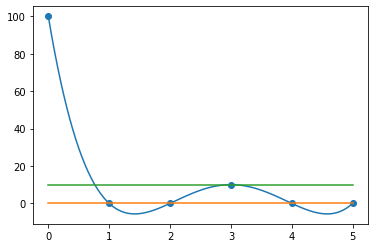

In [6]:
def build_singleton_poly(target_x, target_y, num_points):
    '''
    builds singleton polynomial:
        polynomial zero at every integer in [1,num_points] beside at target_x, where P(target_x) == target_y
    '''

    # Construct polynomial P(x) = 1
    p = poly.Polynomial([1])

    # Builds polynomial where P(x) = (x-1)(x-2)....(x-num_points), excluding target_x if target_x is an integer
    for x in np.arange(1,num_points+1):
        if not x == target_x:
            p *= poly.Polynomial.fromroots(x)
    
    # adjust height of polynomial so P(target_x) = target_y
    p *= target_y/p(target_x)

    return p

#-----------------------------------------------------------------------------------------------------------------
#test
num_points = 5
target_x = 3
target_y = 10

singleton_p = build_singleton_poly(target_x, target_y, num_points)

x_sampling = np.linspace(0, num_points, num=100)

plt.plot(x_sampling,singleton_p(x_sampling))
plt.plot([0,num_points],[0,0])
plt.plot([0,num_points],[target_y,target_y])
plt.scatter(np.arange(0,num_points+1),singleton_p(np.arange(0,num_points+1)))
plt.show()

# lagrange interpolation
* the goal of this function is to find a polynomial that will ony go through select points.
* how we do this is by adding up singletons where each singleton represents a repective points of interest.
* * Since each singleton is zero at every other integer then xi, when adding the singleton will the polynomial be effeected at xi setting it to yi

In [7]:
def lagrange_interp(x, y, num_points):
    '''creates polynomial such that P(x1) = y1, P(x2) = y2, ..., P(xn) = yn,'''
    # creates new polynomial    
    out = poly.Polynomial([0])

    # adds up singletone polynomials such that P(xi) = yi
    # since everyother integer beside xi in the singletone is zero, they add very nicely to form a target polynomial
    for xi, yi in zip(x,y):
        out += build_singleton_poly(xi, yi, num_points)

    return out

# Rank 1 constraint --> Qudratic Span Program

In [8]:
def r1cs_to_QAP(A,B,C):
    '''
    Turns a Rank 1 constraint system, into a Qudratic Span Programming using Lagrange interpolation 
        -turn each test case in our rank 1 constraint, into a polynomial such that the polynomial is zero at "i", for test case "i"
    '''

    A, B, C = A.T, B.T, C.T

    # check all dimensions
    if not (A.shape[0] == B.shape[0] and A.shape[0] == C.shape[0] and C.shape[0] == B.shape[0]):
        print(A.shape[0],B.shape[0],C.shape[0])
        assert False

    # establish lagrange interpolation
    num_points = A.shape[1]
    lag_int = lambda y: lagrange_interp(np.arange(1,num_points+1),  y, num_points)


    poly_A = [lag_int(a) for a in A]
    poly_B = [lag_int(b) for b in B]
    poly_C = [lag_int(c) for c in C]


    # Z(x) = (x-1)(x-2)(x-3)...(x-num_points)
    Z = poly.Polynomial(poly.polyfromroots(np.arange(1,num_points+1)))
    
    return (poly_A, poly_B, poly_C, Z)

In [9]:
def check_QAP(v,A,B,C,Z):
    
    # define the right, left
    left, right, solved = poly.Polynomial([0]), poly.Polynomial([0]), poly.Polynomial([0])

    
    # preform v_i . A_i(t) , v_i . B_i(t), v_i . C_i(t) 
    for i in  range(len(v)):
        left += v[i] * A[i]
        right += v[i] * B[i]
        solved += v[i] * C[i]


    print("left: " + str(left))
    print("right: " + str(right))
    print("solved: " + str(solved))


    # create the final polynomial to check states
    p_final = left * right - solved

    print("final polynomial: " + str(p_final))

    # check if p has divided by Z, with out remained
    remainder = poly.polytrim(poly.polydiv(p_final.coef,Z.coef)[1],tol=0.1)

    return len(remainder) == 1 and remainder[0] == 0




# finally, testing it all

In [10]:
v = compute_variable(3)


left = np.array([
    [0,1,0,0,0],
    [3,1,0,0,0],
    [0,0,1,0,0]
])

right = np.array([
    [0,1,0,0,0],
    [1,0,0,0,0],
    [0,0,0,1,0]
])

out = np.array([
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1] 
])

A,B,C,Z = r1cs_to_QAP(left, right, out)

check_QAP(v,A,B,C,Z)

left: 0.0 + 3.0·x¹
right: 12.0 - 12.5·x¹ + 3.5·x²
solved: 63.0 - 79.5·x¹ + 25.5·x²
final polynomial: -63.0 + 115.5·x¹ - 63.0·x² + 10.5·x³


True

# Run with error!

In [11]:
v = compute_variable(3)

# add error to the calculation!!!!
v[2] += 1

left = np.array([
    [0,1,0,0,0],
    [3,1,0,0,0],
    [0,0,1,0,0]
])

right = np.array([
    [0,1,0,0,0],
    [1,0,0,0,0],
    [0,0,0,1,0]
])

out = np.array([
    [0,0,1,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1] 
])

A,B,C,Z = r1cs_to_QAP(left, right, out)

check_QAP(v,A,B,C,Z)

left: 1.0 + 1.5·x¹ + 0.5·x²
right: 12.0 - 12.5·x¹ + 3.5·x²
solved: 66.0 - 82.0·x¹ + 26.0·x²
final polynomial: -54.0 + 87.5·x¹ - 35.25·x² - 1.0·x³ + 1.75·x⁴


False